## GARCH Models

While the $\mathrm{ARCH}$ model was very simple, the need for simpler models gradually increased due to the disadvantage of having to estimate an increasing number of coefficients. Bollerslev proposed the Generalized ARCH ($\mathrm{GARCH}$) model, which generalizes the $\mathrm{ARCH}$ model and has a form similar to estimating an ARMA model for volatility. Since volatility is estimated through two explanatory variables, it has the advantage of significantly reducing the number of parameters that need to be estimated.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2018-01-01'
data = yf.download(
    '^GSPC',
    start = start_date,
    interval = '1wk',
    progress = False
)

In [2]:
ret = data['Close'].pct_change().dropna()
ret.head()

Date
2018-01-08    0.015708
2018-01-15    0.008635
2018-01-22    0.022265
2018-01-29   -0.038547
2018-02-05   -0.051620
Name: Close, dtype: float64

### 1. Generalized Auto Regressive Conditional Heteroscedasticity

When $a_t$ follows a $\mathrm{GARCH}(m,s)$ model, it can be expressed as:

$$a_t = \sigma_t \epsilon_t, ~~~~~ \sigma_t^2 = \alpha_0 + \sum_{i=1}^m \alpha_i a_{t-1}^2 + \sum_{j=1}^s \beta_j \sigma_{t-j}^2$$

Assuming $\eta_t = a_t^2 - \sigma_t^2$, the $\mathrm{GARCH}$ model can be expressed as:

$$a_t^2 = \alpha_0 + \sum_{i=1}^{\max (m,s)} (\alpha_i + \beta_i) a_{i-1}^2 + \eta_t - \sum_{j=1}^s \beta_j \eta_{t-j}$$

Here, $\eta_t$ is a martingale difference series, an iid sequence with the following properties:
$$E(\eta_t) = 0$$
$$\mathrm{Cov}(\eta_t, \eta_{t-j}) = 0 ~~~ \mathrm{for} ~~ j \geq 1$$

Similar to the $\text{ARMA}$ model, the expected value of $a_t^2$ can be estimated as:

$$E(a_t^2) = \frac{\alpha_0}{1 - \Sigma_{i=1}^{\max (m,s)}(\alpha_i + \beta_i)}$$

For the $\mathrm{GARCH}(1,1)$ model:

$$a_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2, ~~~~~ 0 \leq \alpha_1, \beta_1 \leq 1, (\alpha_1 + \beta_1) < 1$$

The constraint here can be interpreted as the volatility **not diverging**.

#### example 1

Estimate the $\mathrm{GARCH}$ model for the S&P500 index from January 1, 2018. Visualize the estimated model using appropriate methods.

- Determining the order of the $\mathrm{GARCH}$ model is not easy. However, since in most cases the order is (1,1), (1,2), or (2,1), we typically estimate all three models and compare them to select the best one

In the case of $\mathrm{GARCH}(1,1)$

In [5]:
import arch 
import warnings
warnings.filterwarnings('ignore')

garch_model1 = arch.arch_model(
    ret, vol = 'GARCH', 
    p = 1, q = 1
)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 76159986.7419767
Iteration:      2,   Func. Count:     17,   Neg. LLF: 240103405.7883341
Iteration:      3,   Func. Count:     28,   Neg. LLF: 298.3417239673644
Iteration:      4,   Func. Count:     37,   Neg. LLF: 13559126.4179751
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1963.7112277367194
Iteration:      6,   Func. Count:     58,   Neg. LLF: 105189.52196578891
Iteration:      7,   Func. Count:     69,   Neg. LLF: -829.0886338425387
Optimization terminated successfully    (Exit mode 0)
            Current function value: -829.088634760928
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likeli

$\mathrm{GARCH}(1,2)$인 경우

In [6]:
garch_model2 = arch.arch_model(
    ret, vol = 'GARCH', 
    p = 1, q = 2
)
result2 = garch_model2.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2.952569844330844e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 122834218.18182531
Iteration:      3,   Func. Count:     30,   Neg. LLF: -824.9554279636254
Optimization terminated successfully    (Exit mode 0)
            Current function value: -824.9554292603054
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                824.955
Distribution:                  Normal   AIC:                          -1639.91
Method:            Maximum Likelihood   BIC:                          -1620.62
                                        No. Observations:                  350
Date:            

$\mathrm{GARCH}(2,1)$인 경우

In [7]:
garch_model3 = arch.arch_model(
    ret, vol = 'GARCH', 
    p = 2, q = 1
)
result3 = garch_model3.fit()
print(result3.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 47375931.28503682
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3708217.781744276
Iteration:      3,   Func. Count:     30,   Neg. LLF: -827.1516071444703
Optimization terminated successfully    (Exit mode 0)
            Current function value: -827.1516081061089
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                827.152
Distribution:                  Normal   AIC:                          -1644.30
Method:            Maximum Likelihood   BIC:                          -1625.01
                                        No. Observations:                  350
Date:                W

Considering all factors, the $\mathrm{GARCH}(1,2)$ model shows the best performance, so we estimate the final model as follows

$$r_t = 0.00345 + a_t$$
$$a_t = \sigma_t \epsilon_t$$
$$\sigma_t^2 = 0.00007 + 0.2 a_{t-1}^2  - 0.35 σ_{t-1}^2 - 0.35 σ_{t-2}^2$$

The estimated volatility can be plotted using the `conditional_volatility` attribute

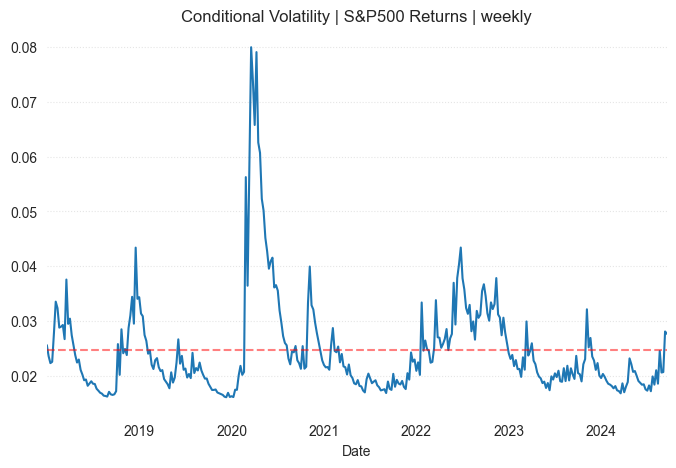

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
result2.conditional_volatility.plot(ax = ax)
plt.axhline(
    result2.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'Conditional Volatility | S&P500 Returns | weekly')
plt.show()

#### Exercise 1.

Predict which market has higher risk between S&P500 and KOSPI. Import KOSPI data starting from January 2018. Estimate an appropriate GARCH model and visualize it. Which market has higher volatility (risk) between S&P500 and KOSPI? Does this match your prediction?
End of Selection

In [ ]:
# Write your code here!

### 2. GJR-GARCH

The GJR-GARCH model has the characteristic of reflecting the asymmetry in return distributions. It effectively models the phenomenon where bad news has a greater impact than good news. The model equation takes the following form:

$$ \sigma_t^2=w+\sum_{k=1}^q(\alpha_k r^2_{t-k}+\gamma r^2_{t-k}I_{t-k}(\epsilon_{t-k}<0))+\sum_{k=1}^p \beta_k \sigma_{t-k}^2$$

Here, $\sigma_t^2$ is the conditional variance (conditional volatility) at time t, $w$ is the constant term, $\alpha_k$ is the coefficient of $r_{t-k}^2$ (coefficient of past squared returns), and $\gamma$ represents the asymmetry coefficient. It is used to reflect additional effects when $\epsilon_{t-k}$ is negative, and $I_{t-k}(\epsilon_{t-k} < 0)$ is an indicator function that equals 1 when $\epsilon_{t-k}$ is negative and 0 otherwise. It can be thought of as a kind of dummy variable. $\beta_k$ is the coefficient of $\sigma_{t-k}^2$ (coefficient of past variance). By specifying $\gamma$ as follows, we can model different scenarios:

- $\gamma=0$: The response to past shocks is the same for positive and negative shocks

- $\gamma>0$: The response to past negative shocks is stronger than the response to positive shocks

- $\gamma<0$: The response to past positive shocks is stronger than the response to negative shocks

#### Stationarity Condition

For the model to be valid, the conditional heteroskedasticity must satisfy **stationarity**. If the stationarity condition is not met, the variance estimated by the model can grow infinitely over time, making realistic volatility estimation impossible. For the GJR-GARCH model to satisfy the stationarity condition, the following conditions must be met:

$$w > 0, \alpha_k >= 0, \gamma >= 0, \beta_k >= 0 ~~~~ \forall k$$

Additionally, the following inequality must hold:

$$\sum_{k=1}^q (\alpha_k + 0.5\gamma) + \sum_{k=1}^p \beta_k < 1$$

This equation is similar to the GARCH model case, but the addition of the $0.5\gamma$ term reflects the characteristics of the GJR-GARCH model. This is a stationarity condition that includes the impact of negative shocks. When the condition is satisfied, the variance will have a constant mean value over time.

In [37]:
gjr_garch = arch.arch_model(
    ret,
    vol = 'GARCH',
    p = 1,
    o = 1,
    q = 1,
)

In [40]:
res_gjr = gjr_garch.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 636772532.9633415
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2.2553059525198752e+17
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2171.440177984248
Iteration:      4,   Func. Count:     39,   Neg. LLF: 23732.667058036903
Iteration:      5,   Func. Count:     46,   Neg. LLF: 47405.722951175165
Iteration:      6,   Func. Count:     56,   Neg. LLF: 1.6562651273789965e+17
Iteration:      7,   Func. Count:     68,   Neg. LLF: 3959.3427959376554
Iteration:      8,   Func. Count:     78,   Neg. LLF: 46.2534364928723
Iteration:      9,   Func. Count:     88,   Neg. LLF: 5628601563881.748
Iteration:     10,   Func. Count:     98,   Neg. LLF: -782.6290238011077
Iteration:     11,   Func. Count:    105,   Neg. LLF: -838.0129084606465
Iteration:     12,   Func. Count:    112,   Neg. LLF: -836.9595556960605
Iteration:     13,   Func. Count:    120,   Neg. LLF: -835.9548110315022
Iteration:     14,   Func. Count:    127,   Neg.

In [45]:
print(res_gjr.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                840.383
Distribution:                  Normal   AIC:                          -1670.77
Method:            Maximum Likelihood   BIC:                          -1651.48
                                        No. Observations:                  350
Date:                Thu, Sep 19 2024   Df Residuals:                      349
Time:                        01:41:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.7301e-03  1.046e-03      2.609  9.084e-03 [6.

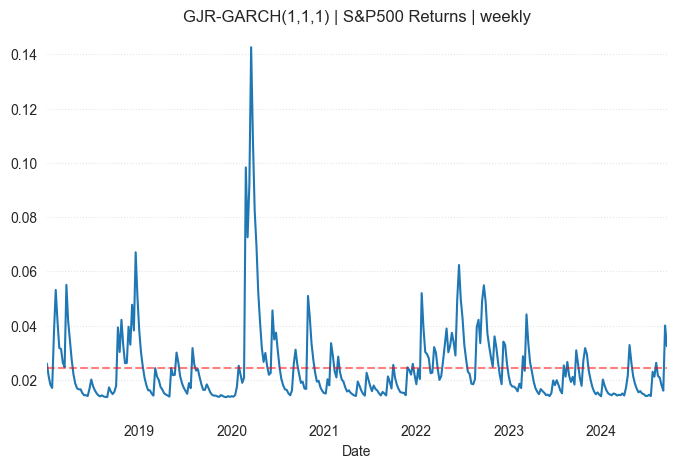

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
res_gjr.conditional_volatility.plot(ax = ax)
plt.axhline(
    res_gjr.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'GJR-GARCH(1,1,1) | S&P500 Returns | weekly')
plt.show()

### 3. Exponential GARCH Model

The EGARCH (Exponential Generalized Autoregressive Conditional Heteroskedasticity) model is designed to effectively model the asymmetric effects of volatility. Particularly, the $EGARCH$ model is specified in logarithmic form, which has the advantage of not requiring additional constraints to prevent volatility from becoming negative. Unlike the $GARCH$ model, treating volatility in logarithmic terms enables more stable volatility estimation.

$$\log(\sigma_t^2)=w+\sum_{k=1}^p \beta_k \log(\sigma_{t-k}^2)+\sum_{k=1}^q \alpha_k \frac{\vert r_{t-k} \vert}{\sqrt {\sigma_{t-k}^2}} + \sum_{k=1}^q \gamma_k \frac{r_{t-k}}{\sqrt{\sigma_{t-k}^2}}$$

where

- $\sigma_t^2$ : Conditional variance (conditional volatility) at time $t$
- $w$ : Constant term, representing the mean level of the model
- $\beta_k$: Coefficient for previous period's log conditional variance
- $\alpha_k$: Coefficient for previous period's absolute returns
- $\gamma_k$: Coefficient for previous period's returns (modeling asymmetric effects)
- $r_{t-k}$: Returns at time $t-k$
- $I_{t-k}(\epsilon_{t-k} < 0)$: Indicator function that equals 1 when $\epsilon_{t-k}$ is negative and 0 otherwise (the $EGARCH$ model doesn't require a separate indicator function due to its logarithmic form)

The EGARCH model is designed to reflect the asymmetry in volatility and can explain the leverage effect commonly observed in financial markets. The $EGARCH$ model effectively models this asymmetry through the $\gamma_k$ coefficient.

#### Stationarity Condition

For the $EGARCH$ model to be valid, the model must satisfy **stationarity**. This means that the variance of the time series data maintains a constant mean and variance over time. The stationarity condition for the $EGARCH$ model is as follows:

$$\sum_{k=1}^p (\beta_k) + \sum_{k=1}^q (\alpha_k + |\gamma_k|) < 1$$

This condition means that the overall responsiveness of the model must be less than 1, allowing the variance to remain stable. In other words, the sum of each coefficient must be less than 1 for the variance to converge over time.

$$\sigma_t^2 = E[(r_t - \mu)^2 | F_{t-1}]$$

Here, $F_{t-1}$ represents the information set up to time $t-1$. This indicates that the current variance depends on past information.

$$\log(\sigma_t^2) = w + \sum_{k=1}^p \beta_k\log(\sigma_{t-k}^2) + \sum_{k=1}^q \alpha_k \frac{|r_{t-k}|}{\sqrt{\sigma_{t-k}^2}} + \sum_{k=1}^q \frac{\gamma_k r_{t-k}}{\sqrt{\sigma_{t-k}^2}}$$

This equation shows that the log conditional variance is determined by past log conditional variance, absolute returns, and the asymmetric effect of returns.

The impact of asymmetry is such that when the $\gamma_k$ coefficient is positive, there is no direct asymmetric effect in the log form since absolute values are not used when returns are negative. However, when $\gamma_k$ is positive, higher returns have a greater impact on conditional variance. Conversely, when $\gamma_k$ is negative, lower returns have a greater impact on conditional variance. If the stationarity condition is satisfied, the conditional variance $\sigma_t^2$ estimated by the $EGARCH$ model changes stably based on past returns and variance, maintaining a certain level. This provides realistic results for modeling and predicting volatility.

In [64]:
egarch = arch.arch_model(
    ret,
    vol = 'EGARCH',
    p = 1,
    o = 1,
    q = 2,
)

In [65]:
res_egarch = egarch.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4.972132098425848e+16
Iteration:      2,   Func. Count:     21,   Neg. LLF: 147508997419.39594
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2775234082.915904
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1310839522.844347
Iteration:      5,   Func. Count:     49,   Neg. LLF: -685.3974875709173
Iteration:      6,   Func. Count:     57,   Neg. LLF: -724.496019281924
Iteration:      7,   Func. Count:     65,   Neg. LLF: -844.5998604037584
Iteration:      8,   Func. Count:     72,   Neg. LLF: -326.12526707244683
Iteration:      9,   Func. Count:     80,   Neg. LLF: -845.3830756607986
Iteration:     10,   Func. Count:     87,   Neg. LLF: -845.452385855505
Iteration:     11,   Func. Count:     94,   Neg. LLF: -845.4712042195769
Iteration:     12,   Func. Count:    101,   Neg. LLF: -845.4760863956187
Iteration:     13,   Func. Count:    108,   Neg. LLF: -845.4763132865482
Iteration:     14,   Func. Count:    115,   Neg. LL

In [66]:
print(res_egarch.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                845.476
Distribution:                  Normal   AIC:                          -1678.95
Method:            Maximum Likelihood   BIC:                          -1655.81
                                        No. Observations:                  350
Date:                Thu, Sep 19 2024   Df Residuals:                      349
Time:                        01:47:03   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.1245e-03  1.180e-03      1.801  7.175e-02 

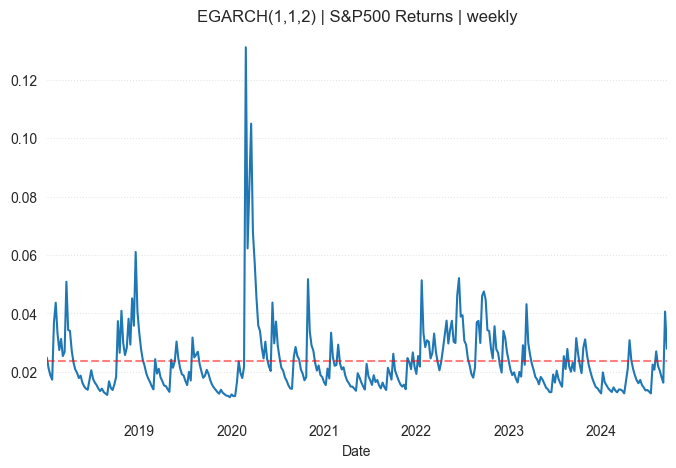

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
res_egarch.conditional_volatility.plot(ax = ax)
plt.axhline(
    res_egarch.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'EGARCH(1,1,2) | S&P500 Returns | weekly')
plt.show()